# Environment

### Libraries and environment variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

pd.options.mode.chained_assignment = None  # default='warn'

# formatter
%reload_ext nb_black

# set figure size globally
# plt.rcParams["figure.figsize"] = (10, 13)

<IPython.core.display.Javascript object>

### Set working directory

In [2]:
import os
from pathlib import Path

# get absolute path of this script and create Path object
path = Path(os.getcwd())

# use Path object to get path of project folder
absolutePath = path.parent.absolute()

# change working directory to project folder
os.chdir(absolutePath)

# get path of project folder
path_projectFolder = os.getcwd()

<IPython.core.display.Javascript object>

### Load Data

In [3]:
test1 = pd.read_csv(path_projectFolder + "/data/test1.csv")
test2 = pd.read_csv(path_projectFolder + "/data/test2.csv")
test3 = pd.read_csv(path_projectFolder + "/data/test3.csv")
test4 = pd.read_csv(path_projectFolder + "/data/test4.csv")

<IPython.core.display.Javascript object>

# EDA

### Schüleranzahl

In [4]:
anzahl1 = len(test1)
anzahl2 = len(test2)
anzahl3 = len(test3)
anzahl4 = len(test4)
print(
    "\n",
    "Subtest 1 Kinder:",
    anzahl1,
    "\n",
    "Subtest 2 Kinder:",
    anzahl2,
    "\n",
    "Subtest 3 Kinder:",
    anzahl3,
    "\n",
    "Subtest 4 Kinder:",
    anzahl4,
    "\n",
)


 Subtest 1 Kinder: 51 
 Subtest 2 Kinder: 51 
 Subtest 3 Kinder: 51 
 Subtest 4 Kinder: 46 



<IPython.core.display.Javascript object>

### 1. Final level

In [5]:
# stacked barchart for level
def level_stacked(df, title, column):
    dataToPlott = df[column].value_counts(normalize=True) * 100
    dataToPlott2 = pd.DataFrame(dataToPlott)
    dataToPlott2["level"] = dataToPlott2.index
    dataToPlott2 = dataToPlott2.transpose()
    dataToPlott2 = dataToPlott2.head(-1)
    dataToPlott2 = dataToPlott2[["A", "B", "C"]]
    print(dataToPlott2)
    dataToPlott2.plot(kind="barh", stacked=True, color=co)
    plt.legend(["level A", "level B", "level C"], bbox_to_anchor=(1.3, 1))
    plt.xlabel("%")
    plt.xticks([0, 10, 20, 30, 40, 50, 50, 60, 70, 80, 90, 100])
    plt.title(title)


# histogram for subtest level
def level_histogram(df, title, colors):
    dataToPlott = df["subtest_result"].value_counts(normalize=True) * 100
    dataToPlott2 = pd.DataFrame(dataToPlott)
    dataToPlott_sorted = dataToPlott2.sort_values("subtest_result")
    dataToPlott_sorted
    dataToPlott_sorted["subtest_result"].plot(kind="barh", color=co)
    plt.title(title)


# colors for bars
co = [
    "lightsteelblue",
    "cornflowerblue",
    "royalblue",
]

<IPython.core.display.Javascript object>

                   A          B          C
end_result  9.803922  31.372549  56.862745


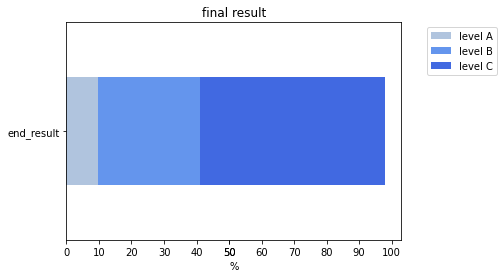

<IPython.core.display.Javascript object>

In [6]:
level_stacked(test1, "final result", "end_result")

### 2. Subtest level

#### Subtest 1 Level

                        A          B          C
subtest_result  17.647059  25.490196  56.862745


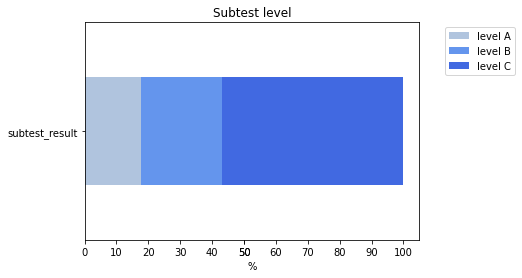

<IPython.core.display.Javascript object>

In [7]:
level_stacked(test1, "Subtest level", "subtest_result")

#### Subtest 2 Level

                        A          B          C
subtest_result  17.647059  25.490196  56.862745


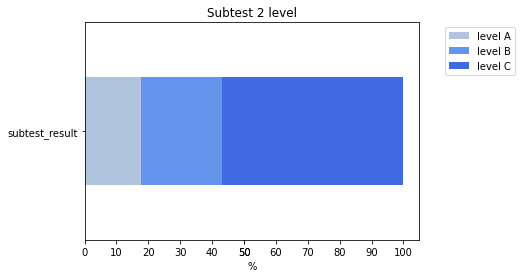

<IPython.core.display.Javascript object>

In [8]:
level_stacked(test2, "Subtest 2 level", "subtest_result")

#### Subtest 3 Level

                       A          B          C
subtest_result  9.803922  25.490196  64.705882


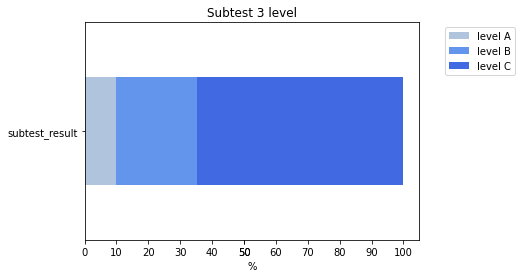

<IPython.core.display.Javascript object>

In [9]:
level_stacked(test3, "Subtest 3 level", "subtest_result")

#### Subtest 4 Level

                        A          B          C
subtest_result  13.043478  26.086957  60.869565


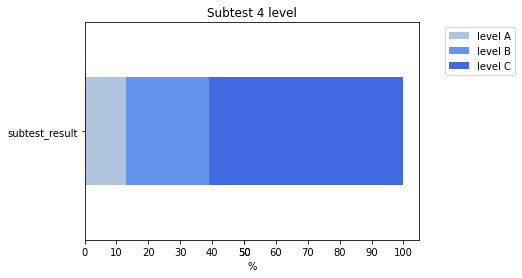

<IPython.core.display.Javascript object>

In [10]:
level_stacked(test4, "Subtest 4 level", "subtest_result")

### 3. Missing Values = Unbeantwortet

In [11]:
def missing_values_per_variable(df, percent=100, dropCol=False):  # sum_missing_values

    ergebnis = [col for col in df.columns if "ergebnis" in col]
    selectedData = df[ergebnis]
    selectedData.replace(99, np.NaN, inplace=True)
    listCol = []
    rowCount = selectedData.shape[0]
    for column in selectedData:
        sumColumn = selectedData[column].isna().sum()
        percentNA = sumColumn / rowCount * 100
        if percentNA <= percent:
            listCol.append(
                {
                    "column": column,
                    "missing_values": sumColumn,
                    "missing_values(%)": percentNA,
                }
            )
        else:
            if dropCol == True:
                print("Column dropped: ", column, ", missing values(%): ", percentNA)
                selectedData.drop([column], axis=1, inplace=True)
    listCol = (
        pd.DataFrame(listCol)
        .sort_values(by="missing_values", ascending=False)
        .reset_index(drop=True)
    )

    listCol.index = listCol["column"]
    listCol.drop("column", axis=1, inplace=True)

    return listCol

<IPython.core.display.Javascript object>

#### Subtest 1: Missing values

In [12]:
missing_values = missing_values_per_variable(test1)
print("Kinder:", anzahl1)
missing_values.head()

Kinder: 51


,missing_values,missing_values(%)
column,,
1_10_ergebnis,5,9.803922
1_4_ergebnis,4,7.843137
1_9_ergebnis,2,3.921569
1_3_ergebnis,1,1.960784
1_5_ergebnis,1,1.960784


<IPython.core.display.Javascript object>

#### Subtest 2: Missing values

In [13]:
missing_values = missing_values_per_variable(test2)
print("Kinder:", anzahl2)
missing_values.head()

Kinder: 51


,missing_values,missing_values(%)
column,,
2_10_ergebnis,12,23.529412
2_8_ergebnis,6,11.764706
2_2_ergebnis,5,9.803922
2_9_ergebnis,5,9.803922
2_7_ergebnis,4,7.843137


<IPython.core.display.Javascript object>

#### Subtest 3: Missing values

In [14]:
missing_values = missing_values_per_variable(test3)
print("Kinder:", anzahl3)
missing_values.head(+10)

Kinder: 51


,missing_values,missing_values(%)
column,,
3_50_ergebnis,32,62.745098
3_22_ergebnis,31,60.784314
3_37_ergebnis,30,58.823529
3_21_ergebnis,29,56.862745
3_20_ergebnis,29,56.862745
3_19_ergebnis,27,52.941176
3_18_ergebnis,27,52.941176
3_17_ergebnis,27,52.941176
3_16_ergebnis,26,50.980392


<IPython.core.display.Javascript object>

#### Subtest 4: Missing values

In [15]:
missing_values = missing_values_per_variable(test4)
print("Kinder:", anzahl4)
missing_values.head(+10)

Kinder: 46


,missing_values,missing_values(%)
column,,
4_29_ergebnis,35,76.086957
4_30_ergebnis,34,73.913043
4_2_ergebnis,34,73.913043
4_3_ergebnis,32,69.565217
4_4_ergebnis,30,65.217391
4_5_ergebnis,29,63.043478
4_6_ergebnis,25,54.347826
4_9_ergebnis,25,54.347826
4_7_ergebnis,24,52.173913


<IPython.core.display.Javascript object>

### 4. Results of Subtest Items

In [16]:
def getFrequencies(df):

    """Aim : To plot data, calculate frequencies of column values
    Result : DF with frequencies and df with freqencies in percentages"""

    ergebnis = [col for col in df.columns if "ergebnis" in col]
    selectedData = df[ergebnis]
    frequencies = {}
    for value in selectedData.columns:
        frequencies[value] = selectedData[value].value_counts()
    data = pd.DataFrame(frequencies)
    dataToPlot = data.transpose()
    dataToPlot_percentages = dataToPlot.div(dataToPlot.sum(axis=1), axis=0) * 100
    dataToPlot_percentages = dataToPlot_percentages[[1, 0, 99]]
    return dataToPlot_percentages, dataToPlot


def plotFrequencies(df, width, height, title, legend, ylabel, xlabel, color):

    """Aim : To plot data, calculate frequencies of column values
    Result : DF with frequencies and df with freqencies in percentages"""

    df.plot(figsize=(width, height), kind="barh", stacked=True, color=colors)
    plt.legend(legend, bbox_to_anchor=(1, 1))
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()


colors = ["g", "r", "b"]
legend = ["richtig", "falsch", "unbeantwortet"]

<IPython.core.display.Javascript object>

#### Subtest 1 : Item results

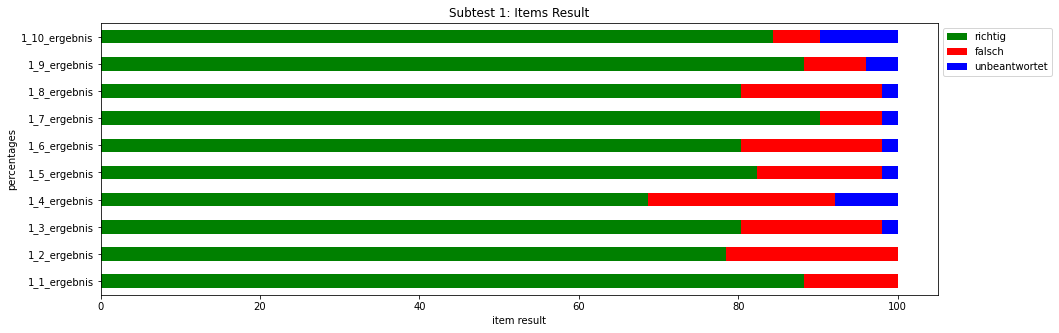

<IPython.core.display.Javascript object>

In [17]:
test1_frequencies_percentages = getFrequencies(test1)[0]
plotFrequencies(
    test1_frequencies_percentages,
    15,
    5,
    "Subtest 1: Items Result",
    legend=legend,
    xlabel="item result",
    ylabel="percentages",
    color=colors,
)

#### Subtest 2: Item results

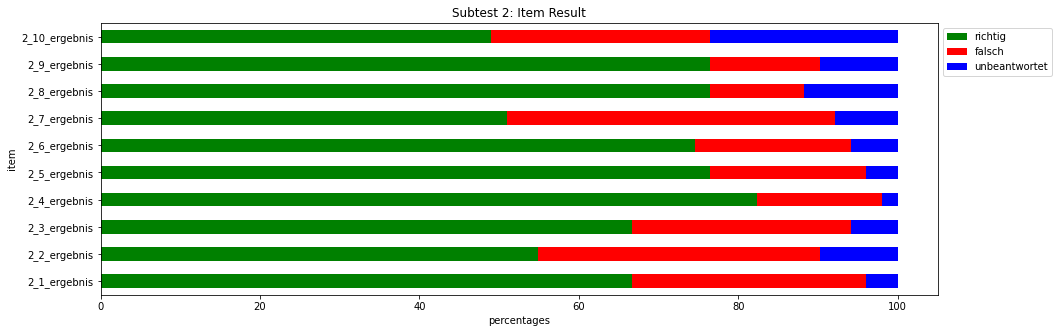

<IPython.core.display.Javascript object>

In [18]:
test2_frequencies_percentages = getFrequencies(test2)[0]

plotFrequencies(
    test2_frequencies_percentages,
    15,
    5,
    "Subtest 2: Item Result",
    legend=legend,
    xlabel="percentages",
    ylabel="item",
    color=colors,
)

#### Subtest 3: Item results

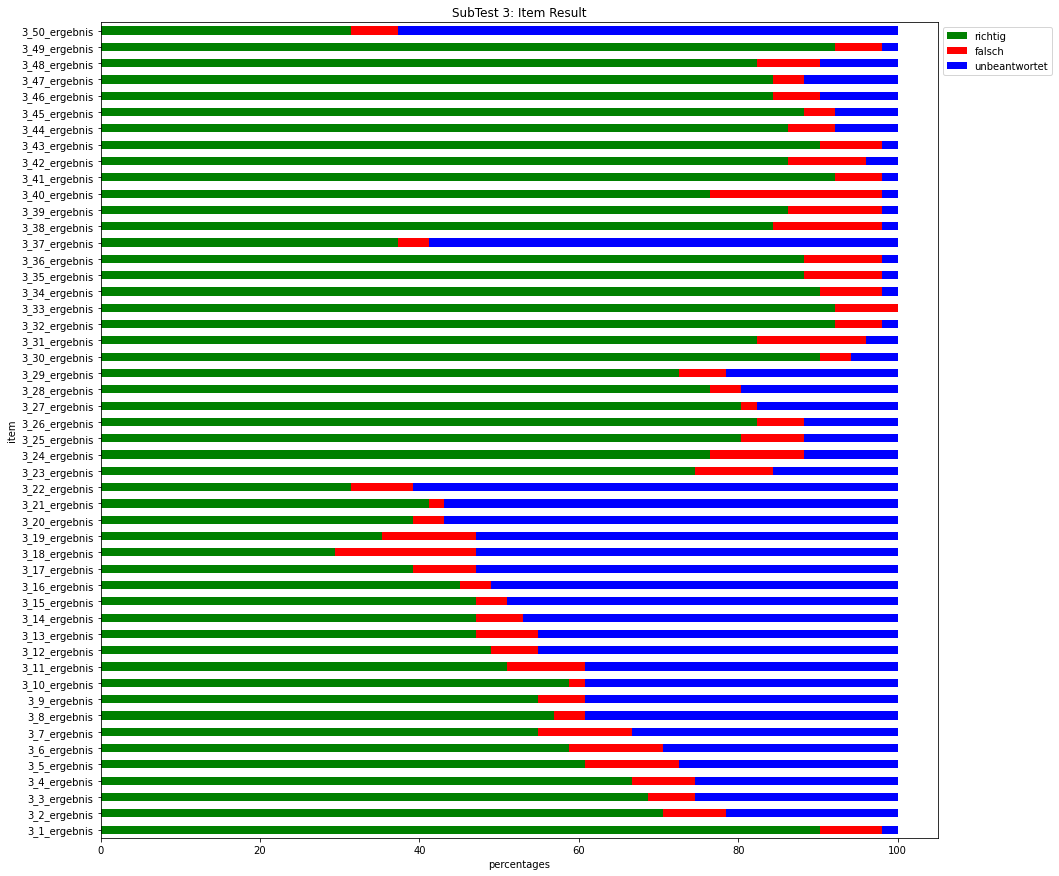

<IPython.core.display.Javascript object>

In [19]:
test3_frequencies_percentages = getFrequencies(test3)[0]

plotFrequencies(
    test3_frequencies_percentages,
    15,
    15,
    "SubTest 3: Item Result",
    legend=legend,
    xlabel="percentages",
    ylabel="item",
    color=colors,
)

#### Subtest 4 : Item results

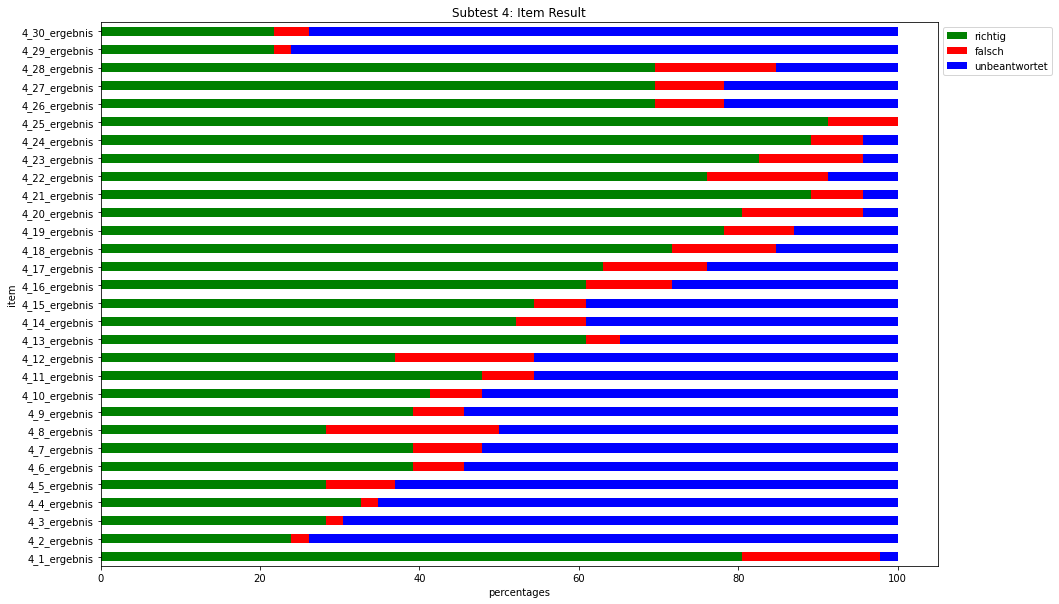

<IPython.core.display.Javascript object>

In [20]:
test4_frequencies_percentages = getFrequencies(test4)[0]

plotFrequencies(
    test4_frequencies_percentages,
    15,
    10,
    "Subtest 4: Item Result",
    legend=legend,
    xlabel="percentages",
    ylabel="item",
    color=colors,
)

### 5. Correlations
Are there significant correlations (> 0.85) between false answers and no response?

In [21]:
# calculate correlation
def correlation(df, col1, col2, text=""):
    column_1 = df[col1]
    column_2 = df[col2]
    correlation = column_1.corr(column_2)
    print(text, correlation)
    return correlation

<IPython.core.display.Javascript object>

#### Subtest 1

In [22]:
dataToPlot1 = getFrequencies(test1)
dataToPlot1 = dataToPlot1[0]
correlation_1 = correlation(
    dataToPlot1, 0, 99, text="Subtest 1, Correlation false & unanswered: "
)

Subtest 1, Correlation false & unanswered:  -0.16724840200141827


<IPython.core.display.Javascript object>

#### Subtest 2

In [23]:
# Test 2
dataToPlot2 = getFrequencies(test2)
dataToPlot2 = dataToPlot2[0]
correlation_2 = correlation(
    dataToPlot2, 0, 99, text="Subtest 2, Correlation false & unanswered: "
)

Subtest 2, Correlation false & unanswered:  0.10171929129252562


<IPython.core.display.Javascript object>

#### Subtest 3

In [24]:
dataToPlot3 = getFrequencies(test3)
dataToPlot3 = dataToPlot3[0]
correlation_3 = correlation(
    dataToPlot3, 0, 99, text="Subtest 3, Correlation false & unanswered: "
)

Subtest 3, Correlation false & unanswered:  -0.22201116427028045


<IPython.core.display.Javascript object>

#### Subtest 4

In [25]:
dataToPlot4 = getFrequencies(test4)
dataToPlot4 = dataToPlot4[0]
correlation_4 = correlation(
    dataToPlot4, 0, 99, text="Subtest 4, Correlation false & unanswered: "
)

Subtest 4, Correlation false & unanswered:  -0.549169154774668


<IPython.core.display.Javascript object>

## Class level

In [26]:
# class level
grouped = test1.groupby(test1.class_level)

<IPython.core.display.Javascript object>

In [27]:
level_1 = grouped.get_group(1)
level_2 = grouped.get_group(2)

<IPython.core.display.Javascript object>

In [28]:
level_1.head()

,unique_id,child_id,subtest_result,end_result,class_level,teacher,class_id,class_name,test,time,...,1_1_ergebnis,1_2_ergebnis,1_3_ergebnis,1_4_ergebnis,1_5_ergebnis,1_6_ergebnis,1_7_ergebnis,1_8_ergebnis,1_9_ergebnis,1_10_ergebnis
17,404_0,0,C,C,1,Degenhardt,404,Wolf,1,00:01:12,...,0,1,1,1,1,1,1,1,1,1
18,404_1,1,A,A,1,Degenhardt,404,Wolf,1,00:00:01,...,0,1,0,0,0,0,1,0,1,0
19,404_10,10,B,B,1,Degenhardt,404,Wolf,1,00:00:46,...,1,0,0,0,1,1,1,0,1,1
20,404_11,11,A,A,1,Degenhardt,404,Wolf,1,00:01:25,...,0,0,0,0,0,0,1,1,0,0
21,404_12,12,B,C,1,Degenhardt,404,Wolf,1,00:01:19,...,1,0,1,0,0,0,1,0,1,1


<IPython.core.display.Javascript object>

<AxesSubplot:>

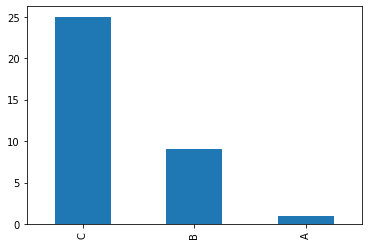

<IPython.core.display.Javascript object>

In [29]:
level_2["subtest_result"].value_counts().plot(kind="bar")

In [30]:
# def getFrequencies(df):
#     ergebnis = [col for col in df.columns if 'ergebnis' in col]
#     selectedData = df[ergebnis]
#     frequencies = {}
#     for value in selectedData.columns:
#         frequencies[value] = selectedData[value].value_counts()
#     data = pd.DataFrame(frequencies)
#     dataToPlot=data.transpose()
#     dataToPlot_percentages = dataToPlot.div(dataToPlot.sum(axis=1), axis=0)*100
#     dataToPlot_percentages = dataToPlot_percentages[[1, 0, 99]]
#     return dataToPlot_percentages, dataToPlot

# def plotFrequencies(df, title):
#     df.plot(kind='barh', stacked=True, color=colors)
#     plt.legend(legend, bbox_to_anchor=(1.0,1))
#     plt.title(title)
#     plt.ylabel('Ergebnis')
#     plt.xlabel('Kumulative Prozente')
#     plt.show()

<IPython.core.display.Javascript object>

In [31]:
data_level1 = getFrequencies(level_1)
data_level1 = data_level1[0]
data_level1

,1,0,99
1_1_ergebnis,68.75,31.25,NaN
1_2_ergebnis,56.25,43.75,NaN
1_3_ergebnis,56.25,37.50,6.25
1_4_ergebnis,31.25,56.25,12.50
1_5_ergebnis,62.50,37.50,NaN
1_6_ergebnis,56.25,43.75,NaN
1_7_ergebnis,75.00,18.75,6.25
1_8_ergebnis,56.25,37.50,6.25
1_9_ergebnis,68.75,18.75,12.50
1_10_ergebnis,62.50,18.75,18.75


<IPython.core.display.Javascript object>

In [32]:
data_level2 = getFrequencies(level_2)
data_level2 = data_level2[0]
data_level2

,1,0,99
1_1_ergebnis,97.142857,2.857143,NaN
1_2_ergebnis,88.571429,11.428571,NaN
1_3_ergebnis,91.428571,8.571429,NaN
1_4_ergebnis,85.714286,8.571429,5.714286
1_5_ergebnis,91.428571,5.714286,2.857143
1_6_ergebnis,91.428571,5.714286,2.857143
1_7_ergebnis,97.142857,2.857143,NaN
1_8_ergebnis,91.428571,8.571429,NaN
1_9_ergebnis,97.142857,2.857143,NaN
1_10_ergebnis,94.285714,NaN,5.714286


<IPython.core.display.Javascript object>

In [33]:
plotFrequencies(data_level1, "Test 1 Level 1")

TypeError: plotFrequencies() missing 6 required positional arguments: 'height', 'title', 'legend', 'ylabel', 'xlabel', and 'color'

<IPython.core.display.Javascript object>

In [ ]:
plotFrequencies(data_level2, 'Test 1Level 2')